In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
import scipy.stats as st
import pandas as pd
import random

In [2]:
trayectorias = 10000
puntos = 365
delta_t = 1/puntos
t = np.linspace(0,1,puntos+1)

**Movimiento Browniano Estandar**

In [3]:
def MBEU(numTrayectorias, numPuntos):
  delta_t = 1/numPuntos
  mb = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      mb[i,j] = mb[i,j-1] + np.sqrt(delta_t) * np.random.normal(0, 1)
  return mb

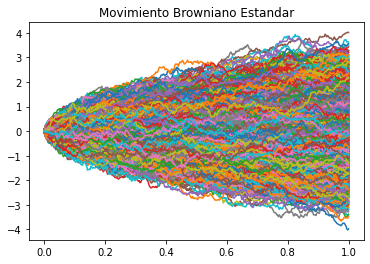

In [4]:
mb = MBEU(trayectorias,puntos)
for i in range(len(mb)):
  plt.plot(t, mb[i, :])
plt.title('Movimiento Browniano Estandar')
plt.show()

$\textbf{Movimiento Browniano Geométrico}$

In [28]:
def GEOMETRIC(numTrayectorias, numPuntos, alpha, lamda):
  mb = MBEU(numTrayectorias, numPuntos)
  gm = np.zeros((numTrayectorias, numPuntos+1))
  t= np.linspace(0,1,numPuntos+1)

  for i in range(numTrayectorias): 
    for j in range(numPuntos+1):
      gm[i,j] = np.exp(alpha*t[j] + lamda*mb[i,j])
  return gm

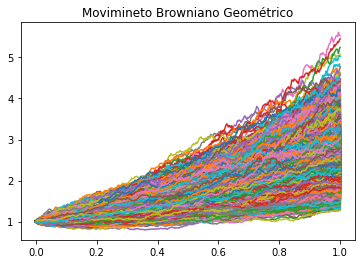

In [29]:
alpha = 0.9
lamda = 0.2
gr = GEOMETRIC(trayectorias,puntos,alpha,lamda)
t = np.linspace(0,1,puntos+1)
for i in range(len(gr)):
  plt.plot(t, gr[i, :])
plt.title('Movimineto Browniano Geométrico')
plt.show()

1.   (a) La medida de centralidad (valor esperado) de dispersión (varianza) y de dispersión conjunta (covarianza). Para ello compare cada una de las propiedades estadísticas teóricas solicitadas con las empíricas.
2.   (b) Si son o no procesos Gaussianos.
3.   (c) Si son o no Movimientos Brownianos Estándar.

Media teorica = 1.6426014221691356 Media simulada = 1.642480077416402
Varianza teorica = 0.0757909889869305 Varianza simulada = 0.07589286708859054
Covarianza teorica = 2.86027397260274 , Covarianza simulada = 2.8003706501668297


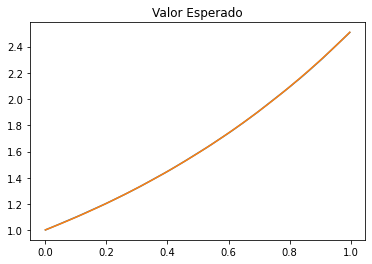

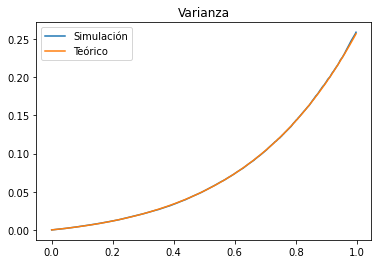

In [30]:
medias_e_gr = [] # Media experimental del Movimiento Browniano Geometrico
medias_t_gr = [] # Media teorica del Movimiento Browniano Geometrico
varianzas_e_gr = [] # Varianza experimental del Movimiento Browniano Geometrico
varianzas_t_gr = [] # Varianza teorica del Movimiento Browniano Geometrico

for i in range(1, puntos+1):
  medias_t_gr.append(np.exp((alpha+(lamda**2)/2)*(i*delta_t)))
  medias_e_gr.append(np.mean(gr[:, i]))
  varianzas_t_gr.append(np.exp((2*alpha+lamda**2)*(i*delta_t))*(np.exp((lamda**2)*(i*delta_t))-1))
  varianzas_e_gr.append(np.var(gr[:, i]))

t_rand = random.randrange(1, puntos + 1)
s_rand = random.randrange(1, puntos + 1)

covarianza_gr = np.cov(dr[:,t_rand-1], dr[:, s_rand-1])
covarianza_e_gr = covarianza_gr[0][1]
covarianza_t_gr = (sigma**2)*np.minimum(s_rand*delta_t, t_rand*delta_t)

print('Media teorica =', np.mean(medias_t_gr), 'Media simulada =', np.mean(medias_e_gr))
print('Varianza teorica =', np.mean(varianzas_t_gr), "Varianza simulada =",np.mean(varianzas_e_gr))
print('Covarianza teorica =', covarianza_t_gr,', Covarianza simulada =', covarianza_e_gr)

fig7 = plt.figure()
t_aux3 = list(np.arange(0,1, delta_t))
plt.plot(t_aux3, medias_e_gr, label="Simulación")
plt.plot(t_aux3, medias_t_gr,label='Teórico')
plt.legend
plt.title("Valor Esperado")
plt.show()

fig8 = plt.figure()
plt.plot(t_aux3, varianzas_e_gr, label="Simulación")
plt.plot(t_aux3, varianzas_t_gr,label= 'Teórico')
plt.legend()
plt.title("Varianza")
plt.show()

>Como podemos evidenciar el valor esperado, la varianza y la covarianza se ajustan de manera adecuada a las teóricas.

¿Es un proceso Gaussiano?

In [32]:
normalidad=0
for i in range(puntos+1):
  stat, prob= st.jarque_bera(gr[:,i])
  if prob>0.05:
    normalidad+=1
print('Porcentaje de instantes de tiempo normales',normalidad*100/puntos,"%")

Porcentaje de instantes de tiempo normales 0.821917808219178 %


>En este caso podemos concluir que no es un proceso Gaussiano, pues el 0.82% de los instantes de tiempo son normales.

¿Es un Movimiento Browniano Estandar?

In [33]:
medias = []
for i in range(1, puntos+1): 
  medias.append(np.mean(gr[:, i]))
print('Promedio de las esperanzas del MBG:', np.mean(medias))

Promedio de las esperanzas del MBG: 1.642480077416402


>El promedio de las esperanzas está lejos de ser 0. Por lo tanto, no se cumple que **E(Wt) = 0**. Entonces el Movimiento Browniano Geometrico no es un MBE.